# Тетрадка с реализацией тестирования указанных в README гипотез.

_Импортируем необходимые библиотеки и посмотрим на данные:_

In [187]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [162]:
df = pd.read_csv('Датасет шахматисты мнение.csv')

In [163]:
df.head()

,Event,Site,Date,Round,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,WhiteTitle,BlackTitle
0,Rated Rapid tournament https://lichess.org/tou...,https://lichess.org/uManRThA,2023.03.01,-,Apostolis_L,laurent971,1-0,1,55,1326,1328,6.0,-6.0,C62,Ruy Lopez: Steinitz Defense,600+0,Normal,NaN,NaN
1,Rated Blitz game,https://lichess.org/j82WFG7O,2023.03.01,-,Chawteenn,EidosRock,1-0,1,29,1749,1775,6.0,-6.0,D32,Tarrasch Defense,180+0,Normal,NaN,NaN
2,Rated Blitz game,https://lichess.org/VVmF1x2d,2023.03.01,-,mathmatical,Ilieck,0-1,1,52,2030,2059,-5.0,6.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,NaN,NaN
3,Rated Rapid game,https://lichess.org/RagJpQJI,2023.03.01,-,Haze0809,Keykodeus,0-1,1,48,1204,1278,-5.0,116.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,600+0,Normal,NaN,NaN
4,Rated Bullet game,https://lichess.org/y3hgXe5H,2023.03.01,-,PaPanDreo,Solus-Christus,0-1,1,97,1545,1564,-5.0,6.0,C50,"Italian Game: Giuoco Pianissimo, Italian Four ...",120+1,Normal,NaN,NaN


# Тестирование гипотез:

__Гипотеза №1__:

*Гипотеза состоит в том, что для игроков "выше среднего" (рейтинг от 1800), действует так называемое "преимущество первого хода";
то есть игроки, которые начинают за белых, выигрывают чаще. Такое обрубание рейтинга было сделано в рамках двух предпосылок:*

* Игроки с низким рейтингом не обладают достаточным опытом, чтобы реализовать это преимущество.

* Игроки с низким рейтингом меньше боятся его потерять, поэтому результаты их игр не столь репрезентативны, ибо они не выкладываются на максимум.

$$
H_0: \mu > 0.5 
\\
$$
$$
  H_1: \mu \le 0.5
$$

_В качестве уровня значимости выберем 5% и рассмотрим распределение результатов матчей._

In [164]:
df.head()

,Event,Site,Date,Round,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,WhiteTitle,BlackTitle
0,Rated Rapid tournament https://lichess.org/tou...,https://lichess.org/uManRThA,2023.03.01,-,Apostolis_L,laurent971,1-0,1,55,1326,1328,6.0,-6.0,C62,Ruy Lopez: Steinitz Defense,600+0,Normal,NaN,NaN
1,Rated Blitz game,https://lichess.org/j82WFG7O,2023.03.01,-,Chawteenn,EidosRock,1-0,1,29,1749,1775,6.0,-6.0,D32,Tarrasch Defense,180+0,Normal,NaN,NaN
2,Rated Blitz game,https://lichess.org/VVmF1x2d,2023.03.01,-,mathmatical,Ilieck,0-1,1,52,2030,2059,-5.0,6.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,NaN,NaN
3,Rated Rapid game,https://lichess.org/RagJpQJI,2023.03.01,-,Haze0809,Keykodeus,0-1,1,48,1204,1278,-5.0,116.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,600+0,Normal,NaN,NaN
4,Rated Bullet game,https://lichess.org/y3hgXe5H,2023.03.01,-,PaPanDreo,Solus-Christus,0-1,1,97,1545,1564,-5.0,6.0,C50,"Italian Game: Giuoco Pianissimo, Italian Four ...",120+1,Normal,NaN,NaN


In [165]:
df.Result[(df.Result != '1-0') & (df.Result != '0-1')] = np.nan
df.Result.dropna(inplace = True)

In [75]:
x = (df[((df.WhiteElo.astype(int)) > 1800) & ((df.BlackElo.astype(int)) > 1800)].Result == '1-0').values

*Рассчитаем статистику для z - теста:*



In [76]:
(np.mean(x) - 0.5)/np.sqrt(np.var(x,ddof = 1)/x.shape[0])

-3.5644476815338253

*Полученное значение сильно меньше 5% квантиля стандартного нормального(-1.64), поэтому нулевая гипотеза отвергается.*

*Теперь применим к данной гипотезе технику бутстрэпа и подсчитаем p-value. Реализовывать будем бутстрэп t-статистики и обратный перцентильный бутстрэп.*

In [172]:
# - реализуем обратный перцентильный бутстрап
def reverse_percentile_p_val(x):
    
    l_naive = []
    l = x.shape[0]
    mean_real = np.mean(x)
    
    boot_indices = np.random.choice(np.arange(l), size=(10**4, l))
    means_boot = np.mean(x[boot_indices], axis=1) - mean_real

    
    return [np.mean(means_boot  < mean_real - 1/2),  means_boot]

# - реализуем т-бутстрап
def t_bootstrap_p_val(x):
    
    l_t = []
    mean_real = np.mean(x)
    
    boot_indices = np.random.choice(np.arange(x.shape[0]), size=(10**4, x.shape[0]))

    means_boot = np.mean(x[boot_indices], axis=1)
    se_boot = (np.std(x[boot_indices], axis=1, ddof = 1))/np.sqrt(x.shape[0])

   
    return [np.mean((means_boot - mean_real)/se_boot < (mean_real - 0.5)/((np.std(x, ddof = 1))/np.sqrt(x.shape[0]))), 
        (means_boot - mean_real)/se_boot]
       

In [170]:
print(f'p-value для обратного бутстрапа и t - бутстрапа: {reverse_percentile_p_val(x)[0]} , {t_bootstrap_p_val(x)[0]} \n оба меньше уровня значимости, гипотеза отвергается.')

p-value для обратного бутстрапа и t - бутстрапа: 0.0001 , 0.0002 
 оба меньше уровня значимости, гипотеза отвергается.


_Вдобавок полюбуемся на распределение бут-статистик._

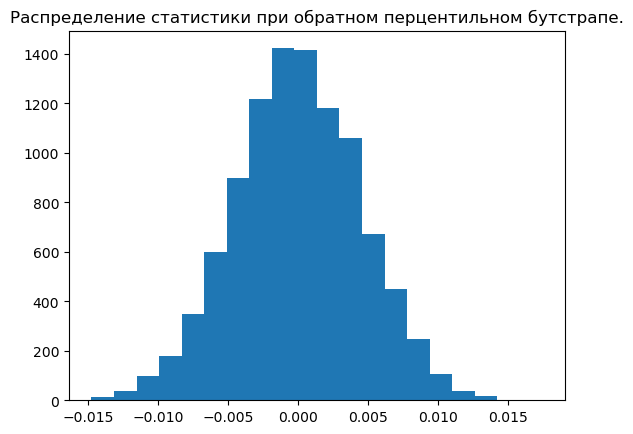

In [202]:
plt.hist(reverse_percentile_p_val(x)[1], bins = 20)
plt.title('Распределение статистики при обратном перцентильном бутстрапе.')
plt.show()

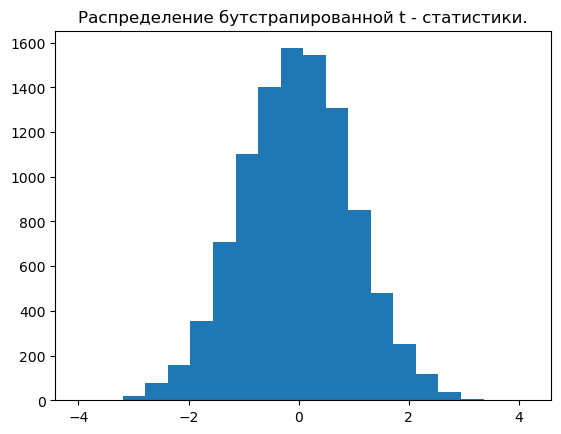

In [180]:
plt.hist(t_bootstrap_p_val(x)[1], bins = 20)
plt.title('Распределение бутстрапированной t - статистики.')
plt.show()

*Попробуем найти порог по рейтингу, для которого возможность первого хода создает статистически значимое различие:*

In [79]:
for i in range(1800, 2200):
    
    x_skilled = df[((df.WhiteElo.astype(int)) > i) & ((df.BlackElo.astype(int)) > i)].Result == '1-0'
    z_obs = (np.mean(x_skilled) - 0.5)/np.sqrt(np.var(x_skilled, ddof = 1)/(x_skilled.shape[0]))
   
    if z_obs > -1.64:
        print(f'Искомый порог: {i}')
        break

Искомый порог: 2132


*В целом, можно сказать, что только на очень высоком рейтинге игроки реализуют преимущество первого хода, что не кажется чем-то крайне контринтуитивным.*

__Гипотеза №2__:

*Посмотрим, есть ли зависимость между временем суток и результативностью игроков обеих групп. Для этого воспользуемся критерием Хи-квадрат пирсона.*

*Предобработаем данные, чтобы отделить утро, день, вечер и ночь по UTC по количеству секунд, прошедших с 00:00.*

In [183]:
df.Result[df.Result == '1-0'] = 1
df.Result[df.Result == '0-1'] = 0

df_chi = df.copy()

df_chi.UTCTime[ (0 <= df_chi.UTCTime) &  (df_chi.UTCTime <= 21600)] = 1
df_chi.UTCTime[(21600 < df_chi.UTCTime) & (df_chi.UTCTime<= 43200)] = 2
df_chi.UTCTime[(43200 < df_chi.UTCTime) & (df_chi.UTCTime<= 64800)] = 3
df_chi.UTCTime[64800 < df_chi.UTCTime] = 4

time = df_chi.UTCTime

time[time == 1] = 'Ночь'
time[time == 2] = 'Утро'
time[time == 3] = 'День'
time[time == 4] = 'Вечер'

df_chi.UTCTime = time

*Для построения матрицы сопряженности посчитаем количество побед и поражений белых(и наоборот для черных), в зависимости от времени суток.*

In [136]:
morning_win_white = df_chi[df_chi.UTCTime == 'Утро'].Result.value_counts()[1]
noon_win_white = df_chi[df_chi.UTCTime == 'День'].Result.value_counts()[1]
evening_win_white = df_chi[df_chi.UTCTime == 'Вечер'].Result.value_counts()[1]
night_win_white = df_chi[df_chi.UTCTime == 'Ночь'].Result.value_counts()[1]

morning_lose_white = df_chi[df_chi.UTCTime == 'Утро'].Result.value_counts()[0]
noon_lose_white = df_chi[df_chi.UTCTime == 'День'].Result.value_counts()[0]
evening_lose_white = df_chi[df_chi.UTCTime == 'Вечер'].Result.value_counts()[0]
night_lose_white = df_chi[df_chi.UTCTime == 'Ночь'].Result.value_counts()[0]

Составим матрицу сопряженности.

In [166]:
# Создание DataFrame из матрицы
matrix = np.array([[morning_win_white, morning_lose_white],
                   [noon_win_white, noon_lose_white],
                   [evening_win_white, evening_lose_white],
                   [night_win_white, night_lose_white]])

times_of_day = ['Утро', 'День', 'Вечер', 'Ночь']
columns = ['Выигрыши', 'Проигрыши']

df_m = pd.DataFrame(matrix, index=times_of_day, columns=columns)

# Вывод информации о победах и поражениях по временам суток
df_m

,Выигрыши,Проигрыши
Утро,4707,4431
День,6820,6769
Вечер,5855,5581
Ночь,3057,2884


In [158]:
sts.chi2_contingency(matrix, correction=False).pvalue

0.1581273760134131

Данное значение p-value говорит о том, что гипотеза не отвергается и время дня не оказывает статистически значимого влияния на результативность белых или черных игроков. Из этого можно сделать выводы, что, например, люди из азиатских регионов не имеют особых преимуществ над европейцами в шахматах(т.к. время мы оценивали по UTC).

__Вывод:__ гипотеза о независимости не отвергается: время проведения матча не оказывает статистически значимого влияния на результаты.

__Гипотеза №3__:

_Теперь займёмся проверкой гипотезы о равенстве долей._

_Пусть нулевая гипотеза состоит в том, что средний рейтинг у игроков, игравших за белых, и игроков, игравших за черных, равны, альтернатива двусторонняя._


$$ H_0: \mu_{white} = \mu_{black} $$ 

$$ H_1: \mu_{white} \neq \mu_{black} $$

Какую интерпретацию можно дать? Если бы в среднем рейтинг белых был бы выше или ниже, чем у черных, мы бы наблюдали дисбаланс результатов матчей. То есть можно было бы говорить о неоднородности рассматриваемой выборки.

In [185]:
white = df.WhiteElo
black = df.BlackElo

Пользуемся тестом Уэлча, т.к. дисперсии никогда на практике не равны, а при больших n квантили рассматриваемого распределения сойдутся к стандартному нормальному.

In [189]:
S, pvalue_welch = ttest_ind(white, black, equal_var=False, alternative='two-sided')

In [190]:
pvalue_welch

0.7684525423612888

_P-value больше уровня значимости, причем с запасом, гипотеза о равенстве средних не отвергается._

__Вывод__: *В целом на основе данного теста можно сделать вывод о том, что мы получили довольно однородную выборку из игроков и статистически значимых различий между категориями нет.*